In [1]:
# Import all the required modules
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras import backend as k
import matplotlib.pyplot as plt
import numpy as np

/usr/local/anaconda2/lib/python2.7/site-packages/h5py/__init__.py:36: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from ._conv import register_converters as _register_converters
/usr/local/anaconda2/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
/usr/local/anaconda2/lib/python2.7/site-packages/h5py/__init__.py:45: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from . import h5a, h5d, h5ds, h5f, h5fd, h5g, h5r, h5s, h5t, h5p, h5z
/usr/local/anaconda2/lib/python2.7/site-packages/h5py/_hl/group.py:22: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from .. import h5g, h5i, h5o, h5r, h5t,

## Load MNIST dataset into train and test datasets

In [2]:
# Load dataset

(x_train, y_train), (x_test, y_test) = mnist.load_data()
y_test_val = y_test

In [3]:
# check train and test datasets
print(x_train.shape)
print(y_train.shape)

print(x_test.shape)
print(y_test.shape)
print(y_test_val.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)
(10000,)


## Visualize MNIST digits from training dataset

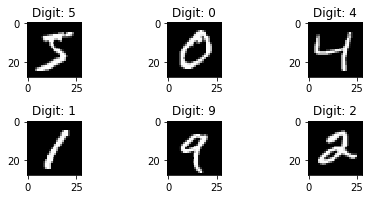

In [4]:
# visualising some training dataset
for i in range(6):
    plt.subplot(3, 3, i + 1)
    plt.imshow(x_train[i], cmap = 'gray', interpolation = 'none')
    plt.title('Digit: {}'.format(y_train[i]))
    plt.tight_layout()

## Reshape dataset

In [5]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

print('x train shape:', x_train.shape)

x train shape: (60000, 28, 28, 1)


In [6]:
print(np.unique(y_train, return_counts=True))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]))


In [7]:
#set number of categories
category = 10

In [8]:
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, category)
y_test = keras.utils.to_categorical(y_test, category)
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

## Building a CNN model, convolitonal filter, maxpooling, dropout, flatten, dense, and second level dense and dropout, compile

In [9]:
input_shape = (28, 28, 1)
# building model
model = Sequential()

#convolutional layer with rectified linear unit activation
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))

#32 convolution filters used each of size 3x3
model.add(Conv2D(64, (3, 3), activation='relu'))

#64 convolution filters used each of size 3x3
#choose the best features via pooling
model.add(MaxPooling2D(pool_size=(2, 2)))

#randomly turn neurons on and off to improve convergence
model.add(Dropout(0.25))

#flatten since too many dimensions, we only want a classification output
model.add(Flatten())

#fully connected to get all relevant data
model.add(Dense(128, activation='relu'))

#one more dropout
model.add(Dropout(0.5))

#output a softmax to squash the matrix into output probabilities
model.add(Dense(category, activation='softmax'))

#Adaptive learning rate (adaDelta) is a popular form of gradient descent rivaled only by adam and adagrad
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [10]:
batch = 128
epoch = 20
#model training
model_log = model.fit(x_train, y_train,
          batch_size=batch,
          epochs=epoch,
          verbose=1,
          validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 108s 2ms/step - loss: 0.2527 - acc: 0.9217 - val_loss: 0.0607 - val_acc: 0.9812
Epoch 2/20
60000/60000 [==============================] - 101s 2ms/step - loss: 0.0847 - acc: 0.9750 - val_loss: 0.0370 - val_acc: 0.9871
Epoch 3/20
60000/60000 [==============================] - 110s 2ms/step - loss: 0.0649 - acc: 0.9802 - val_loss: 0.0419 - val_acc: 0.9857
Epoch 4/20
60000/60000 [==============================] - 113s 2ms/step - loss: 0.0546 - acc: 0.9832 - val_loss: 0.0320 - val_acc: 0.9894
Epoch 5/20
60000/60000 [==============================] - 108s 2ms/step - loss: 0.0472 - acc: 0.9858 - val_loss: 0.0298 - val_acc: 0.9904
Epoch 6/20
60000/60000 [==============================] - 111s 2ms/step - loss: 0.0409 - acc: 0.9878 - val_loss: 0.0268 - val_acc: 0.9920
Epoch 7/20
60000/60000 [==============================] - 110s 2ms/step - loss: 0.0366 - acc: 0.9884 - val_loss: 0.0274 - 

## Evaluate model, plot model accuracy and model loss

In [11]:
# evaluate model
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.026310968459603283
Test accuracy: 0.9918


#### Test model accuracy and model loss, we can see that model accuracy is 99%,  very good

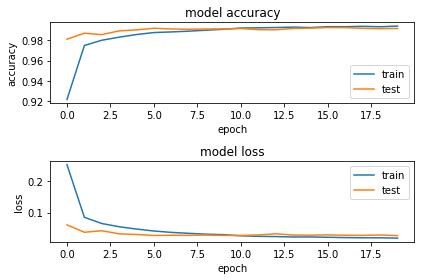

In [12]:
# plotting model accuracy and model loss

plt.subplot(2,1,1)
plt.plot(model_log.history['acc'])
plt.plot(model_log.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(model_log.history['loss'])
plt.plot(model_log.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()


## Model summary

In [13]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
__________

## Predict model, show images

In [14]:
# Predict images
preds = model.predict(x_test)
print(preds)

[[4.1134826e-12 2.1186454e-10 2.8110567e-10 ... 1.0000000e+00
  1.6609885e-13 2.4097073e-11]
 [6.4122425e-08 2.2333654e-07 9.9999964e-01 ... 8.5601963e-11
  1.1398714e-09 4.9138529e-14]
 [1.2789494e-09 9.9999940e-01 5.0245244e-09 ... 1.5246400e-07
  6.1433441e-09 6.3349065e-10]
 ...
 [8.0509878e-18 4.1693762e-12 1.6362412e-14 ... 2.9457725e-09
  2.3566593e-10 5.3237170e-09]
 [2.1312958e-13 2.0254965e-14 1.2233422e-17 ... 3.9262766e-14
  6.4279519e-09 4.1045282e-14]
 [2.2803082e-08 2.4154331e-11 2.0991234e-07 ... 4.1610904e-13
  2.2189024e-08 6.0966183e-11]]


In [15]:
preds = np.argmax(np.round(preds), axis=1)

In [16]:
preds.shape, y_test_val.shape

((10000,), (10000,))

## Plot correct prediction handwritten digits

Found correct labels:  9915


ValueError: Width and height specified must be non-negative

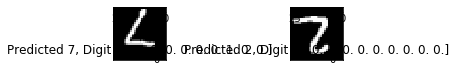

In [17]:
# print(preds)
# print(y_test)
correct = np.where(preds == y_test_val)[0]

print ('Found correct labels: ', len(correct))
for i, correct in enumerate(correct[:9]):
    plt.subplot(3, 3, i + 1)
    plt.imshow(x_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Digit {}".format(preds[correct], y_test[correct]))
    plt.tight_layout()

## Plot incorrect prediction handwritten digits

In [ ]:
incorrect = np.where(preds != y_test_val)[0]

print ('Found correct labels: ', len(incorrect))
for i, incorrect in enumerate(incorrect[:9]):
    plt.subplot(3, 3, i + 1)
    plt.imshow(x_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Digit {}".format(preds[incorrect], y_test[incorrect]))
    plt.tight_layout()